In [0]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras import Sequential
from keras.layers import Embedding

Using TensorFlow backend.


In [0]:
( xTrain , yTrain ) , ( xTest , yTest ) = imdb.load_data( num_words=5000 )  

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# yTrain = keras.utils.to_categorical( yTrain , num_classes=2 ) 
# yTest = keras.utils.to_categorical( yTest , num_classes=2 ) 

In [0]:
xTrain = pad_sequences( xTrain , maxlen=200 , padding='pre' ) 
xTest = pad_sequences( xTest , maxlen=200 , padding='pre' )

In [0]:
batch_size = 64
epochs = 5

xValidTrain, yValidTrain = xTrain[:100], yTrain[:100]
xTrain, yTrain = xTrain[100:], yTrain[100:]

model = Sequential()
model.add(Embedding(500, 10, input_length=200))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))



In [0]:
model.compile(
    optimizer='adam' ,
    loss='binary_crossentropy' ,
    metrics=[ 'accuracy' ]
)

In [0]:
history = model.fit( xTrain , yTrain , validation_data=(xValidTrain, yValidTrain), batch_size=batch_size , epochs=epochs, verbose=1 ) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24900 samples, validate on 100 samples
Epoch 1/5
24900/24900 [==============================] - 129s 5ms/step - loss: 0.5451 - accuracy: 0.7096 - val_loss: 0.3608 - val_accuracy: 0.8800
Epoch 2/5
24900/24900 [==============================] - 126s 5ms/step - loss: 0.4294 - accuracy: 0.8093 - val_loss: 0.3430 - val_accuracy: 0.8400
Epoch 3/5
24900/24900 [==============================] - 127s 5ms/step - loss: 0.3991 - accuracy: 0.8268 - val_loss: 0.3638 - val_accuracy: 0.8400
Epoch 4/5
24900/24900 [==============================] - 126s 5ms/step - loss: 0.3903 - accuracy: 0.8307 - val_loss: 0.3485 - val_accuracy: 0.8600
Epoch 5/5
24900/24900 [==============================] - 125s 5ms/step - loss: 0.3895 - accuracy: 0.8276 - val_loss: 0.3266 - val_accuracy: 0.8800


In [0]:
_,acc = model.evaluate( xTest , yTest )
print(acc * 100)

25000/25000 [==============================] - 22s 878us/step
82.71600008010864


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


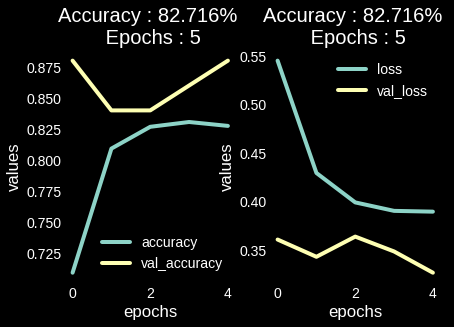

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style

print(style.available)

style.use('dark_background')

y = [x for x in range(epochs)]

plt.subplot(1,2,1)
plt.plot(y, history.history['accuracy'], label='accuracy')
plt.plot(y, history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('values')
plt.xlabel('epochs')
plt.legend(loc=0)
plt.title('Accuracy : 82.716% \n Epochs : 5')


plt.subplot(1,2,2)
plt.plot(y, history.history['loss'], label='loss')
plt.plot(y, history.history['val_loss'], label='val_loss')
plt.ylabel('values')
plt.xlabel('epochs')
plt.legend(loc=0)
plt.title('Accuracy : 82.716% \n Epochs : 5')



plt.show()

In [0]:
model.save('./myModel-5Epochs.h5')

In [0]:
from keras.models import load_model

model = load_model('./myModel-2-5Epochs.h5')
_,acc = model.evaluate(xTest, yTest)
print(acc*100)

model = load_model('./myModel-2-7Epochs.h5')
_,acc = model.evaluate(xTest, yTest)
print(acc*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


25000/25000 [==============================] - 28s 1ms/step
83.61600041389465
25000/25000 [==============================] - 28s 1ms/step
83.51200222969055
